# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

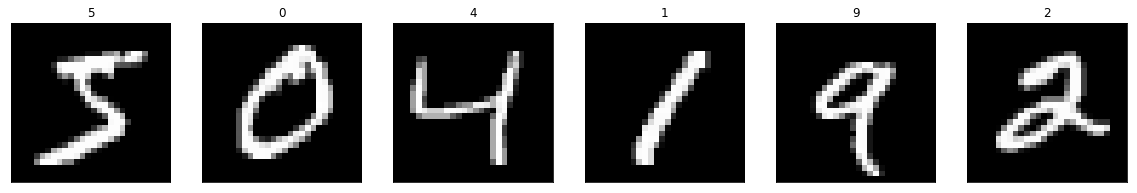

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

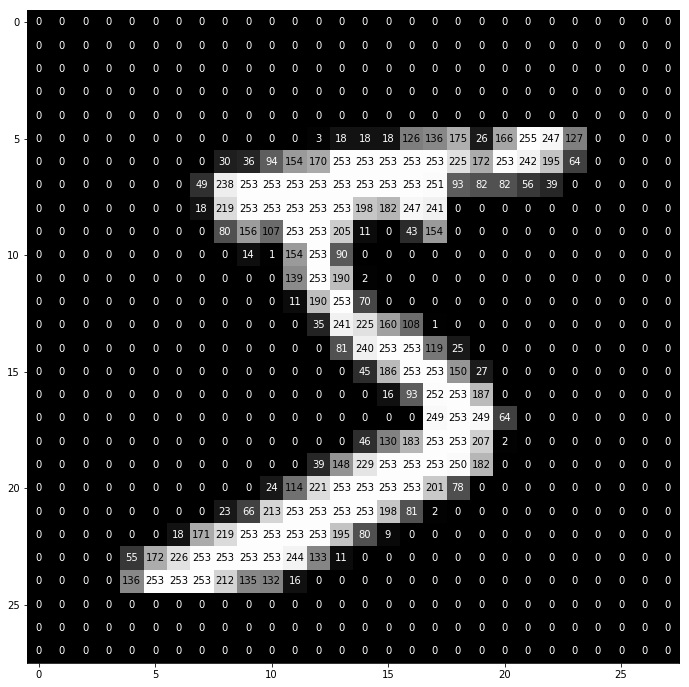

In [11]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [4]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### 7. Compile the Model

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [7]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 10.2500%


### 9. Train the Model

In [8]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.2768 - acc: 0.9133 - val_loss: 0.1318 - val_acc: 0.9600
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.1128 - acc: 0.9661 - val_loss: 0.1010 - val_acc: 0.9695
Epoch 3/10
48000/48000 [==============================] - 1s - loss: 0.0813 - acc: 0.9750 - val_loss: 0.0890 - val_acc: 0.9725
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.0641 - acc: 0.9802 - val_loss: 0.0866 - val_acc: 0.9764
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.0521 - acc: 0.9850 - val_loss: 0.0927 - val_acc: 0.9759
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.0440 - acc: 0.9864 - val_loss: 0.0954 - val_acc: 0.9797
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.0387 - acc: 0.9885 - val_loss: 0.0860 - val_acc: 0.9799
Epoch 8/10
48000/48000 [==============================] - 1s 

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [9]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [10]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.1700%


### Model Analysis

In [71]:
# Putting the model in a method
def mlp_model(indx, batch_size=64, dropout=True, activation=True, nodes=256,layers=4):
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    
    for layer in range(layers):
        if activation:
            model.add(Dense(nodes, activation='relu'))
        else:
            model.add(Dense(nodes))
        if dropout:
            model.add(Dropout(0.2))
        
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    checkpointer = ModelCheckpoint(filepath='mnist.model.best.{}'.format(indx), 
                                   verbose=0, save_best_only=True)
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=10,
              validation_split=0.2, callbacks=[checkpointer],
              verbose=0, shuffle=True)
    model.load_weights('mnist.model.best.{}'.format(indx))
    score = model.evaluate(X_test, y_test, verbose=0)
    return 100 * score[1]

In [65]:
def run_model(param):
    losses = {'nodes': [], 'scores': []}
    for i, v in enumerate(param):
        losses['nodes'].append(v)
        losses['scores'].append(mlp_model(indx=i+1, batch_size=v))
        print('Completed: {} of {}, Score: {}'.format(i, len(nodes), losses['scores'][-1]))
    return losses

Varying the amount of nodes in each of the hidden layers

In [34]:
nodes = [2**n for n in range(6,12)]
losses = run_model(nodes)

Completed: 0 of 6, Score: 97.2
Completed: 1 of 6, Score: 97.84
Completed: 2 of 6, Score: 98.02
Completed: 3 of 6, Score: 97.99
Completed: 4 of 6, Score: 97.48
Completed: 5 of 6, Score: 97.88


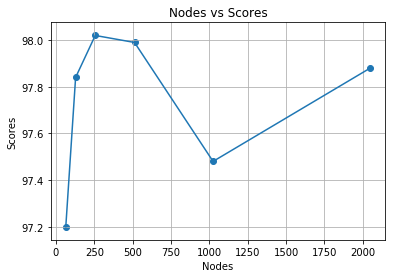

In [45]:
plot_scores(losses['nodes'], losses['scores'], 'Nodes', 'Scores')
# 256 best option

In [37]:
def plot_scores(x, y, xlabel, ylabel):
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('{} vs {}'.format(xlabel, ylabel))
    plt.grid()
    plt.show()

Varying the amount of hidden layers

In [52]:
hidden_scores = [i for i in range(1, 6)]
layer_losses = run_model(hidden_layers)

Completed: 0 of 6, Score: 97.97
Completed: 1 of 6, Score: 97.68
Completed: 2 of 6, Score: 97.69
Completed: 3 of 6, Score: 98.03
Completed: 4 of 6, Score: 97.75


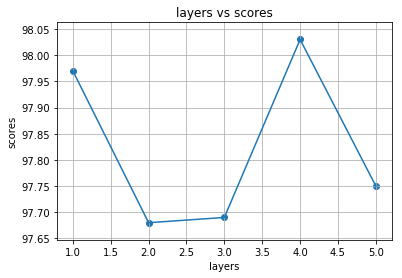

In [53]:
plot_scores(layer_losses['nodes'], layer_losses['scores'], 'layers', 'scores')
# 4 layers best option

Removing dropout layers

In [58]:
dropout_score = mlp_model(1, dropout=False)
print('Score without dropout: {}'.format(dropout_score))

Score without dropout: 97.6


Score is slightly lower without drop out

In [61]:
activation_score = mlp_model(1, activation=False)
print('Score without dropout: {}'.format(activation_score))

Score without dropout: 90.7


WOOH now that's a huge drop

Completed: 0 of 6, Score: 96.89999999999999
Completed: 1 of 6, Score: 97.67
Completed: 2 of 6, Score: 97.66
Completed: 3 of 6, Score: 97.85000000000001
Completed: 4 of 6, Score: 97.61999999999999
Completed: 5 of 6, Score: 97.52
Completed: 6 of 6, Score: 96.93


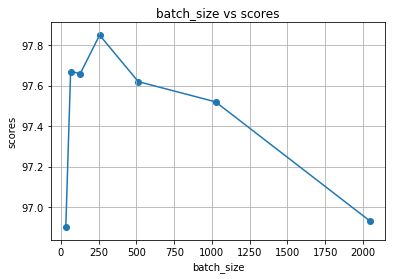

In [66]:
batch_size = [2**n for n in range(5, 12)]
batch_scores = run_model(batch_size)
plot_scores(batch_scores['nodes'], batch_scores['scores'], 'batch_size', 'scores')

best model batch_size = 256

Running the model with all the best parameters

In [72]:
best_model = mlp_model(1)
print('Final score: {}'.format(best_model))

Final score: 97.75
